In [1]:
# pip install torch torchvision matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# 라이브러리 가져오기

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import numpy as np


# 데이터셋 준비

In [4]:
# 데이터 전처리 (이미지 정규화)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# CIFAR-10 데이터셋 다운로드 및 로드
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# 클래스 이름
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


# 데이터 확인

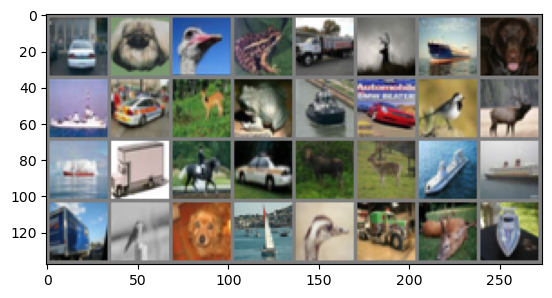

car   dog   bird  frog  truck deer  ship  dog  


In [5]:
# 데이터 확인 (이미지 시각화)
def imshow(img):
    img = img / 2 + 0.5  # 정규화 해제
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 샘플 데이터 확인
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))


# 간단한 CNN 모델 정의

In [6]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # 입력 채널: 3, 출력 채널: 32
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 풀링
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Fully Connected Layer
        self.fc2 = nn.Linear(128, 10)  # 10개의 클래스
        
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleCNN()


# 학습구성

In [7]:
# 손실 함수와 최적화기 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


# GPU 사용가능 여부 판별기
- 사용 가능 시 GPU의 이름과 메모리가 나오고, 사용할 수 없을 경우 사용할수없다고 나옴!

In [8]:
import tensorflow as tf

# GPU 사용 가능 여부 확인
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPU 사용 가능! GPU 이름: {tf.config.experimental.get_device_details(gpus[0])['device_name']}")
else:
    print("GPU를 사용할 수 없습니다.")


GPU를 사용할 수 없습니다.


# 모델 학습

- GPU 사용이 가능할 경우 실행하면 됩니다

In [ ]:
import torch

# GPU 사용 가능 여부 확인 및 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 모델을 GPU로 이동
net = net.to(device)

# 학습 루프
for epoch in range(10):  # 10번 반복
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 데이터와 라벨을 GPU로 이동
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # 학습 단계
        optimizer.zero_grad()  # 기울기 초기화
        outputs = net(inputs)  # 모델 출력
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트

        running_loss += loss.item()
        if i % 200 == 199:  # 200번마다 출력
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')


# GPU 사용이 불가한 경우
- 아래 코드 실행하시면 됩니다.

In [9]:
for epoch in range(10):  # 10번 반복
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()  # 기울기 초기화
        outputs = net(inputs)  # 모델 출력
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트

        running_loss += loss.item()
        if i % 200 == 199:  # 200번마다 출력
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')


[1,   200] loss: 2.279
[1,   400] loss: 2.171
[1,   600] loss: 2.026
[1,   800] loss: 1.907
[1,  1000] loss: 1.819
[1,  1200] loss: 1.761
[1,  1400] loss: 1.697
[2,   200] loss: 1.582
[2,   400] loss: 1.531
[2,   600] loss: 1.508
[2,   800] loss: 1.479
[2,  1000] loss: 1.442
[2,  1200] loss: 1.407
[2,  1400] loss: 1.404
[3,   200] loss: 1.347
[3,   400] loss: 1.340
[3,   600] loss: 1.330
[3,   800] loss: 1.309
[3,  1000] loss: 1.292
[3,  1200] loss: 1.280
[3,  1400] loss: 1.260
[4,   200] loss: 1.231
[4,   400] loss: 1.200
[4,   600] loss: 1.196
[4,   800] loss: 1.170
[4,  1000] loss: 1.165
[4,  1200] loss: 1.158
[4,  1400] loss: 1.145
[5,   200] loss: 1.109
[5,   400] loss: 1.103
[5,   600] loss: 1.113
[5,   800] loss: 1.106
[5,  1000] loss: 1.061
[5,  1200] loss: 1.060
[5,  1400] loss: 1.051
[6,   200] loss: 1.011
[6,   400] loss: 1.008
[6,   600] loss: 1.029
[6,   800] loss: 1.014
[6,  1000] loss: 0.995
[6,  1200] loss: 0.981
[6,  1400] loss: 0.988
[7,   200] loss: 0.945
[7,   400] 

# 1차 모델 평가
- loss : 0.690 에서 start

In [15]:
correct = 0
total = 0
with torch.no_grad():  # 학습 비활성화
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')


Accuracy: 68.76%


# 재학습 후 2차 모델 평가
- loss : 0.320 에서 start

In [20]:
correct = 0
total = 0
with torch.no_grad():  # 학습 비활성화
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')


Accuracy: 71.35%


# 재학습 후 3차 모델 평가
- loss : 0.216 에서 start

In [27]:
correct = 0
total = 0
with torch.no_grad():  # 학습 비활성화
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')


Accuracy: 71.36%


# 재학습 후 4차 모델 평가
- loss : 0.029 에서 start

In [28]:
correct = 0
total = 0
with torch.no_grad():  # 학습 비활성화
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')


Accuracy: 71.36%


# 4차 모델 평가 전, 데이터 증강 및 정규화 과정

In [10]:
import torchvision.transforms as transforms

# 데이터 증강 설정
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 이미지를 좌우로 뒤집기
    transforms.RandomCrop(32, padding=4),  # 이미지를 무작위로 자르고 패딩 추가
    transforms.ToTensor(),  # 이미지를 텐서로 변환
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 정규화
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 데이터셋 정의
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


# 데이터 증강 및 정규화 후 머신러닝

In [11]:
import torch

# 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 학습 루프
for epoch in range(10):  # 10번 반복
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 데이터와 라벨을 GPU 또는 CPU로 이동
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()  # 기울기 초기화
        outputs = net(inputs)  # 모델 출력
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트

        running_loss += loss.item()
        if i % 200 == 199:  # 200번마다 출력
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')


Using device: cpu
[1,   200] loss: 1.246
[1,   400] loss: 1.147
[1,   600] loss: 1.137
[1,   800] loss: 1.102
[1,  1000] loss: 1.097
[1,  1200] loss: 1.059
[1,  1400] loss: 1.054
[2,   200] loss: 1.043
[2,   400] loss: 1.029
[2,   600] loss: 1.040
[2,   800] loss: 1.028
[2,  1000] loss: 1.016
[2,  1200] loss: 0.986
[2,  1400] loss: 1.004
[3,   200] loss: 0.982
[3,   400] loss: 0.961
[3,   600] loss: 0.982
[3,   800] loss: 0.982
[3,  1000] loss: 0.964
[3,  1200] loss: 0.979
[3,  1400] loss: 0.970
[4,   200] loss: 0.944
[4,   400] loss: 0.920
[4,   600] loss: 0.975
[4,   800] loss: 0.956
[4,  1000] loss: 0.938
[4,  1200] loss: 0.957
[4,  1400] loss: 0.932
[5,   200] loss: 0.930
[5,   400] loss: 0.922
[5,   600] loss: 0.933
[5,   800] loss: 0.920
[5,  1000] loss: 0.907
[5,  1200] loss: 0.916
[5,  1400] loss: 0.889
[6,   200] loss: 0.921
[6,   400] loss: 0.900
[6,   600] loss: 0.906
[6,   800] loss: 0.883
[6,  1000] loss: 0.872
[6,  1200] loss: 0.867
[6,  1400] loss: 0.893
[7,   200] loss:

# 1차 추가학습 후 모델 평가
- loss : 0.745 에서 start

In [12]:
correct = 0
total = 0
with torch.no_grad():  # 학습 비활성화
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')


Accuracy: 74.08%


# 현재 Accuracy : 74.889%
- 사슴 사진을 인식 시킨 후 결과 보기
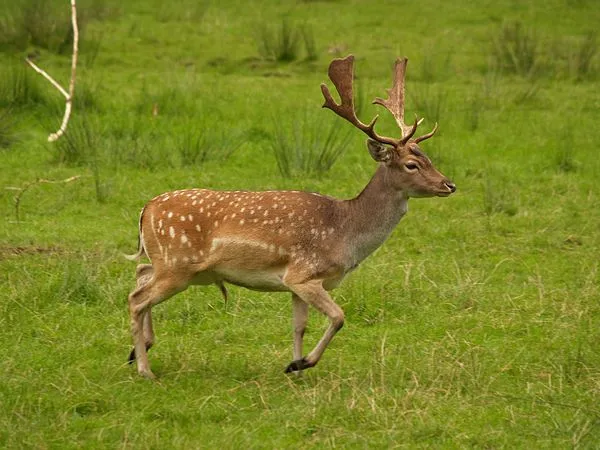

In [13]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# 이미지 경로
image_path = "deer.webp"

# 이미지 로드
image = Image.open(image_path)


In [14]:
# 전처리: 크기 조정, 텐서 변환, 정규화
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # 크기 조정
    transforms.ToTensor(),       # 텐서로 변환
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # CIFAR-10과 동일하게 정규화
])

# 전처리된 이미지 생성
input_image = transform(image).unsqueeze(0)  # 배치 차원 추가


In [15]:
# 모델을 평가 모드로 전환
net.eval()

# 이미지를 GPU로 이동 (GPU 사용 가능 시)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)
input_image = input_image.to(device)


In [16]:
# 예측 실행
output = net(input_image)

# 가장 높은 확률의 클래스 선택
_, predicted = torch.max(output, 1)

# CIFAR-10 클래스 이름
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

# 결과 출력
print(f"Predicted Class: {classes[predicted.item()]}")


Predicted Class: deer


# 예측 성공! 이번엔 고양이 이미지로 테스트해보기
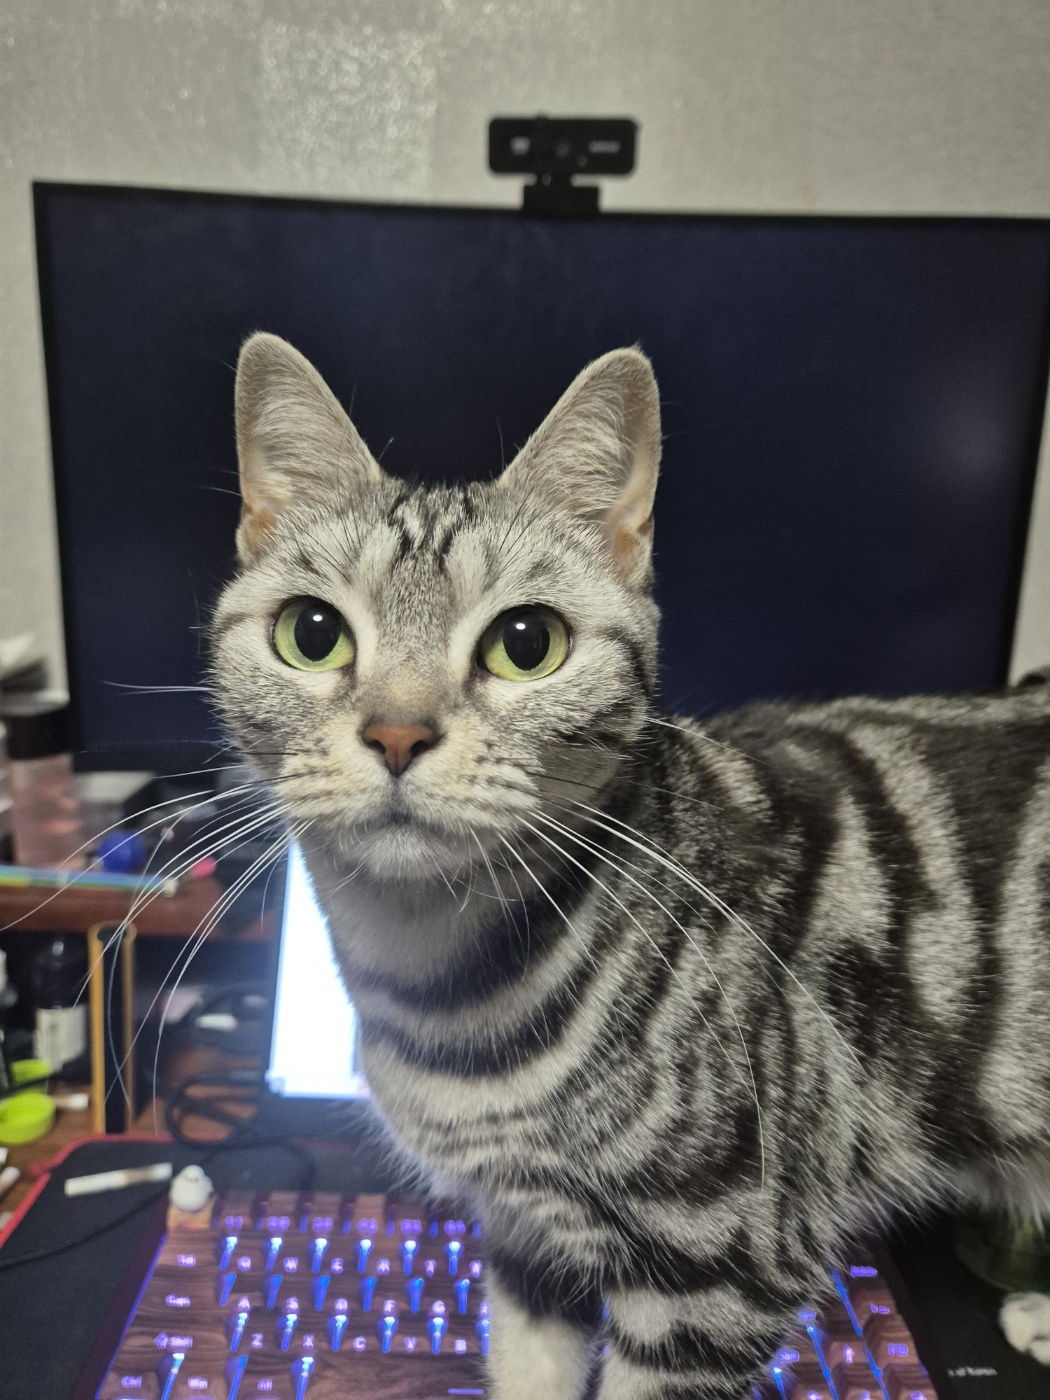
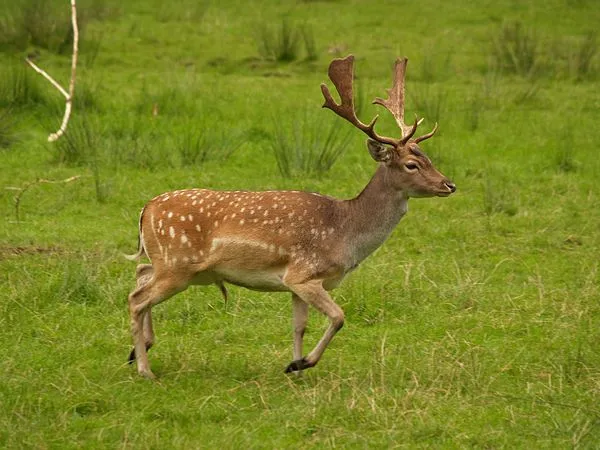

In [17]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# 이미지 경로
image_path = "cat.jpg"

# 이미지 로드
image = Image.open(image_path)


In [18]:
# 전처리: 크기 조정, 텐서 변환, 정규화
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # 크기 조정
    transforms.ToTensor(),       # 텐서로 변환
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # CIFAR-10과 동일하게 정규화
])

# 전처리된 이미지 생성
input_image = transform(image).unsqueeze(0)  # 배치 차원 추가


In [19]:
# 모델을 평가 모드로 전환
net.eval()

# 이미지를 GPU로 이동 (GPU 사용 가능 시)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)
input_image = input_image.to(device)


In [20]:
# 예측 실행
output = net(input_image)

# 가장 높은 확률의 클래스 선택
_, predicted = torch.max(output, 1)

# CIFAR-10 클래스 이름
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

# 결과 출력
print(f"Predicted Class: {classes[predicted.item()]}")


Predicted Class: cat
